원본 : https://arxiv.org/pdf/1709.01507.pdf

일반적인 CNN은 입력에 대해서 convolution filter을 filter size에 적용해 필터의 갯수가 곧 convolution layer의 channel 갯수가 된다.

SqueezeNet에서는 채널 방향으로 global average pooling을 적용해 압축된 정보를 활용하여 중요한 채널이 활성화 할 수 있게 한다.

# Squeeze

In [1]:
from IPython.display import Image

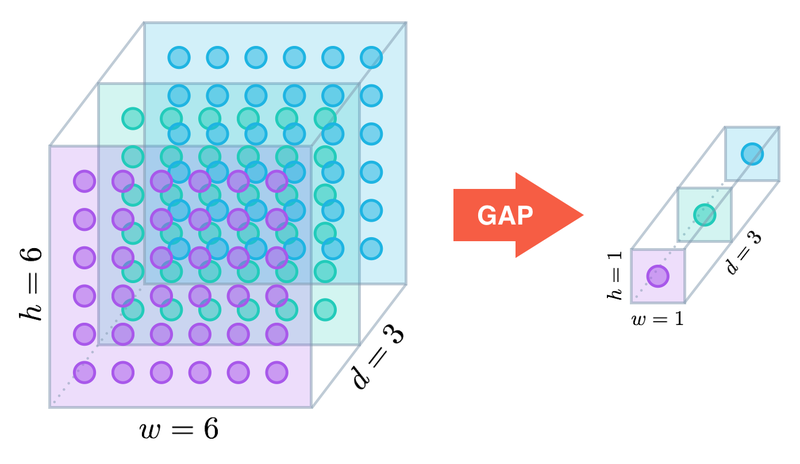

In [2]:
Image('./squeeze_1.png')

Squeeze는 feature에서 중요한 정보를 짜내는 과정이다. feature map의 channel에서 어느 channel이 중요한지 정보를 만들기 위해선 우선 channel에 따른 정보를 압축해서 가져와야 한다. 일반적으로 CNN에서 많이 사용하는 pooling 기법을 사용한다. 풀링은 보통 kernal의 영역의 정보를 압축하는데 사용. 커널영역에 대해 최대값을 남기는것은 Max Pooling, 평균값을 남기는 것은 Average Pooling이라고 한다.

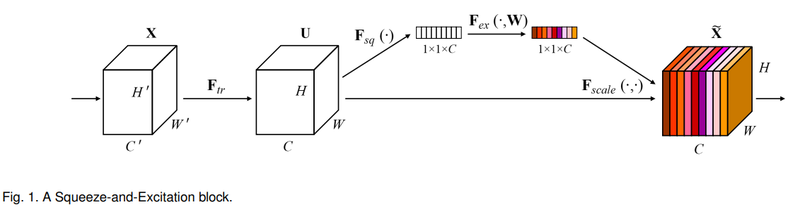

In [3]:
Image('./squeeze_2.png')

위 그림을 잘 보면 Squeeze는 Fsq함수에서 일어난다. HxWxC의 feature map U에서 squeeze를 적용하면 1x1xC의 크기가 나오게 된다. 벡터의 차원을 보면, 각 채널마다 1x1의 형태로 2D featuremap 전체에 평균값을 남기는 global average pooling을 수행한 것으로 보인다. 이렇게 얻어진 1x1xC 벡터는 channel별 정보를 압축해 담고 있다.

# Excitate

채널별 정보를 짜는데 성공했다면, 채널별 정보에 따라 어떤 채널을 강조해야할지 판단을 해야한다. 채널을 강조하는 것을 excitation으로 표현하며, 수식은 다음과 같다.

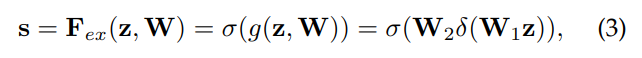

In [4]:
Image('./squeeze_3.png')

z는 이전 global average pooling을 적용한 squeeze 활동의 결과물이다. 위 특성에 W1을 곱해주는 linera layer을 거치고 Relu 활성화 함수 δ을 거친다. 이후 W2을 곱해주는 linear layer을 거치고 마지막으로 sigmoid 함수 σ을 거친다.

이때 sigmoid를 사용하는 이유는 가장 중요한 하나의 채널만 활성화 되는것이 아닌, 여러 channel들이 서로 다른 정도로 활성화되도록 하기 위함이다. dataset에 softmax를 사용해서 단 하나의 최대값을 찾지만, 하나의 대상에도 여러개의 클래스의 정답 label을 지정 할 수 잇는 sigmoid를 사용하는 것과 같은방식이다.

이렇게 계산된 vector를 기존 feature map에 곱하여 중요한 channel이 활성화 할 수 있게 만들어 준다.